In [8]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol, for example 'AAPL' for Apple Inc.
ticker_symbol = 'TSLA'

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch the last 1 month of 5-minute interval data and name it df_minute
df = ticker.history(period='5y', interval='1d')

# Filter out weekends
df = df[df.index.dayofweek < 5]

# Reset the index to make 'Date' a column
df = df.reset_index()

# Convert the 'Date' column to just the date (removes time)
df['Date'] = df['Date'].dt.date

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-11-18,23.528000,23.543333,23.073334,23.332666,66006000,0.0,0.0
1,2019-11-19,23.450001,23.999332,23.186666,23.968000,115872000,0.0,0.0
2,2019-11-20,24.000000,24.080000,23.304667,23.481333,100876500,0.0,0.0
3,2019-11-21,23.634001,24.056000,23.600000,23.655333,91650000,0.0,0.0
4,2019-11-22,22.677334,22.733334,22.000000,22.202667,253059000,0.0,0.0


In [9]:
# Rename columns to 'ds' and 'y' as required by prophet
df = df[["Date", "Close"]].copy()
df.columns = ["ds", "y"]

df.head()

,ds,y
0,2019-11-18,23.332666
1,2019-11-19,23.968000
2,2019-11-20,23.481333
3,2019-11-21,23.655333
4,2019-11-22,22.202667


In [10]:
from prophet import Prophet

model = Prophet()
model.fit(df)


22:32:01 - cmdstanpy - INFO - Chain [1] start processing


22:32:01 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# Specify the forecast horizon (e.g., 60 days)
future = model.make_future_dataframe(periods=180)  # Forecasts 60 days into the future

# Make predictions
forecast = model.predict(future)

In [12]:
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]])

             ds        yhat  yhat_lower  yhat_upper
0    2019-11-18   17.668323  -24.182341   60.458233
1    2019-11-19   17.067414  -23.654882   61.598668
2    2019-11-20   17.634284  -22.369300   54.991070
3    2019-11-21   17.051827  -25.530500   59.413408
4    2019-11-22   16.927955  -23.926732   59.525700
...         ...         ...         ...         ...
1433 2025-05-10  201.095745  152.466343  246.217511
1434 2025-05-11  200.009651  153.885965  244.902579
1435 2025-05-12  182.526523  137.729333  227.974599
1436 2025-05-13  180.711081  134.940412  226.906210
1437 2025-05-14  180.159380  134.502688  226.225744

[1438 rows x 4 columns]


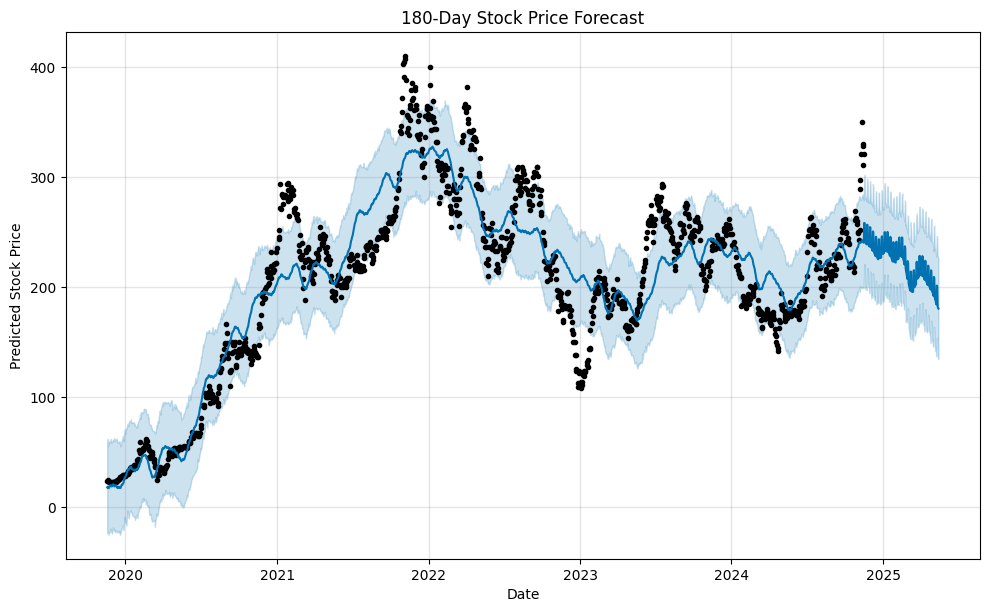

In [13]:
import matplotlib.pyplot as plt

# Plot the forecast
model.plot(forecast)
plt.title("180-Day Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Stock Price")
plt.show()